In [3]:
import os 
import sys 

functionPath = os.path.join( '..', '..', 'text_mining')
sys.path.append( functionPath )

import get_vectors as gv 

In [4]:
tfidf_vector = gv.get_tf_idf( '../../text_mining', '../../src_txt' )
svd_vector = gv.get_SVD_vectors( '../../text_mining', '../../src_txt', 100 )

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\PuSung\AppData\Local\Temp\jieba.cache
Loading model cost 0.783 seconds.
Prefix dict has been built successfully.


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn import metrics

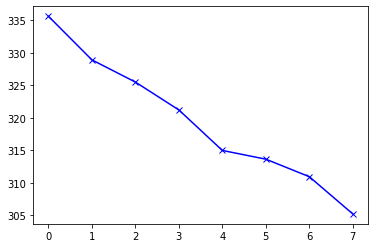

In [6]:
n_clusters = 10
cost = []
for i in range( 2, n_clusters ) : 
    kmeans = KMeans( n_clusters = i )
    kmeans.fit( svd_vector )
    cost.append( kmeans.inertia_ )
plt.plot( cost, 'bx-' )


In [7]:
final_n_clusters = 6
final_kmeans = KMeans( n_clusters = final_n_clusters )
final_kmeans.fit( svd_vector )

KMeans(n_clusters=6)

In [8]:
final_kmeans.labels_
dc = {}
for i in range( len( final_kmeans.labels_ ) ):
    try :
        dc[final_kmeans.labels_[i]].append( i )
    except :
        dc[final_kmeans.labels_[i]] = [i]

In [9]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np 
from scipy.cluster.hierarchy import dendrogram

In [24]:
hac = AgglomerativeClustering( linkage='ward', n_clusters=100  )
hac.fit( svd_vector )

AgglomerativeClustering(n_clusters=100)

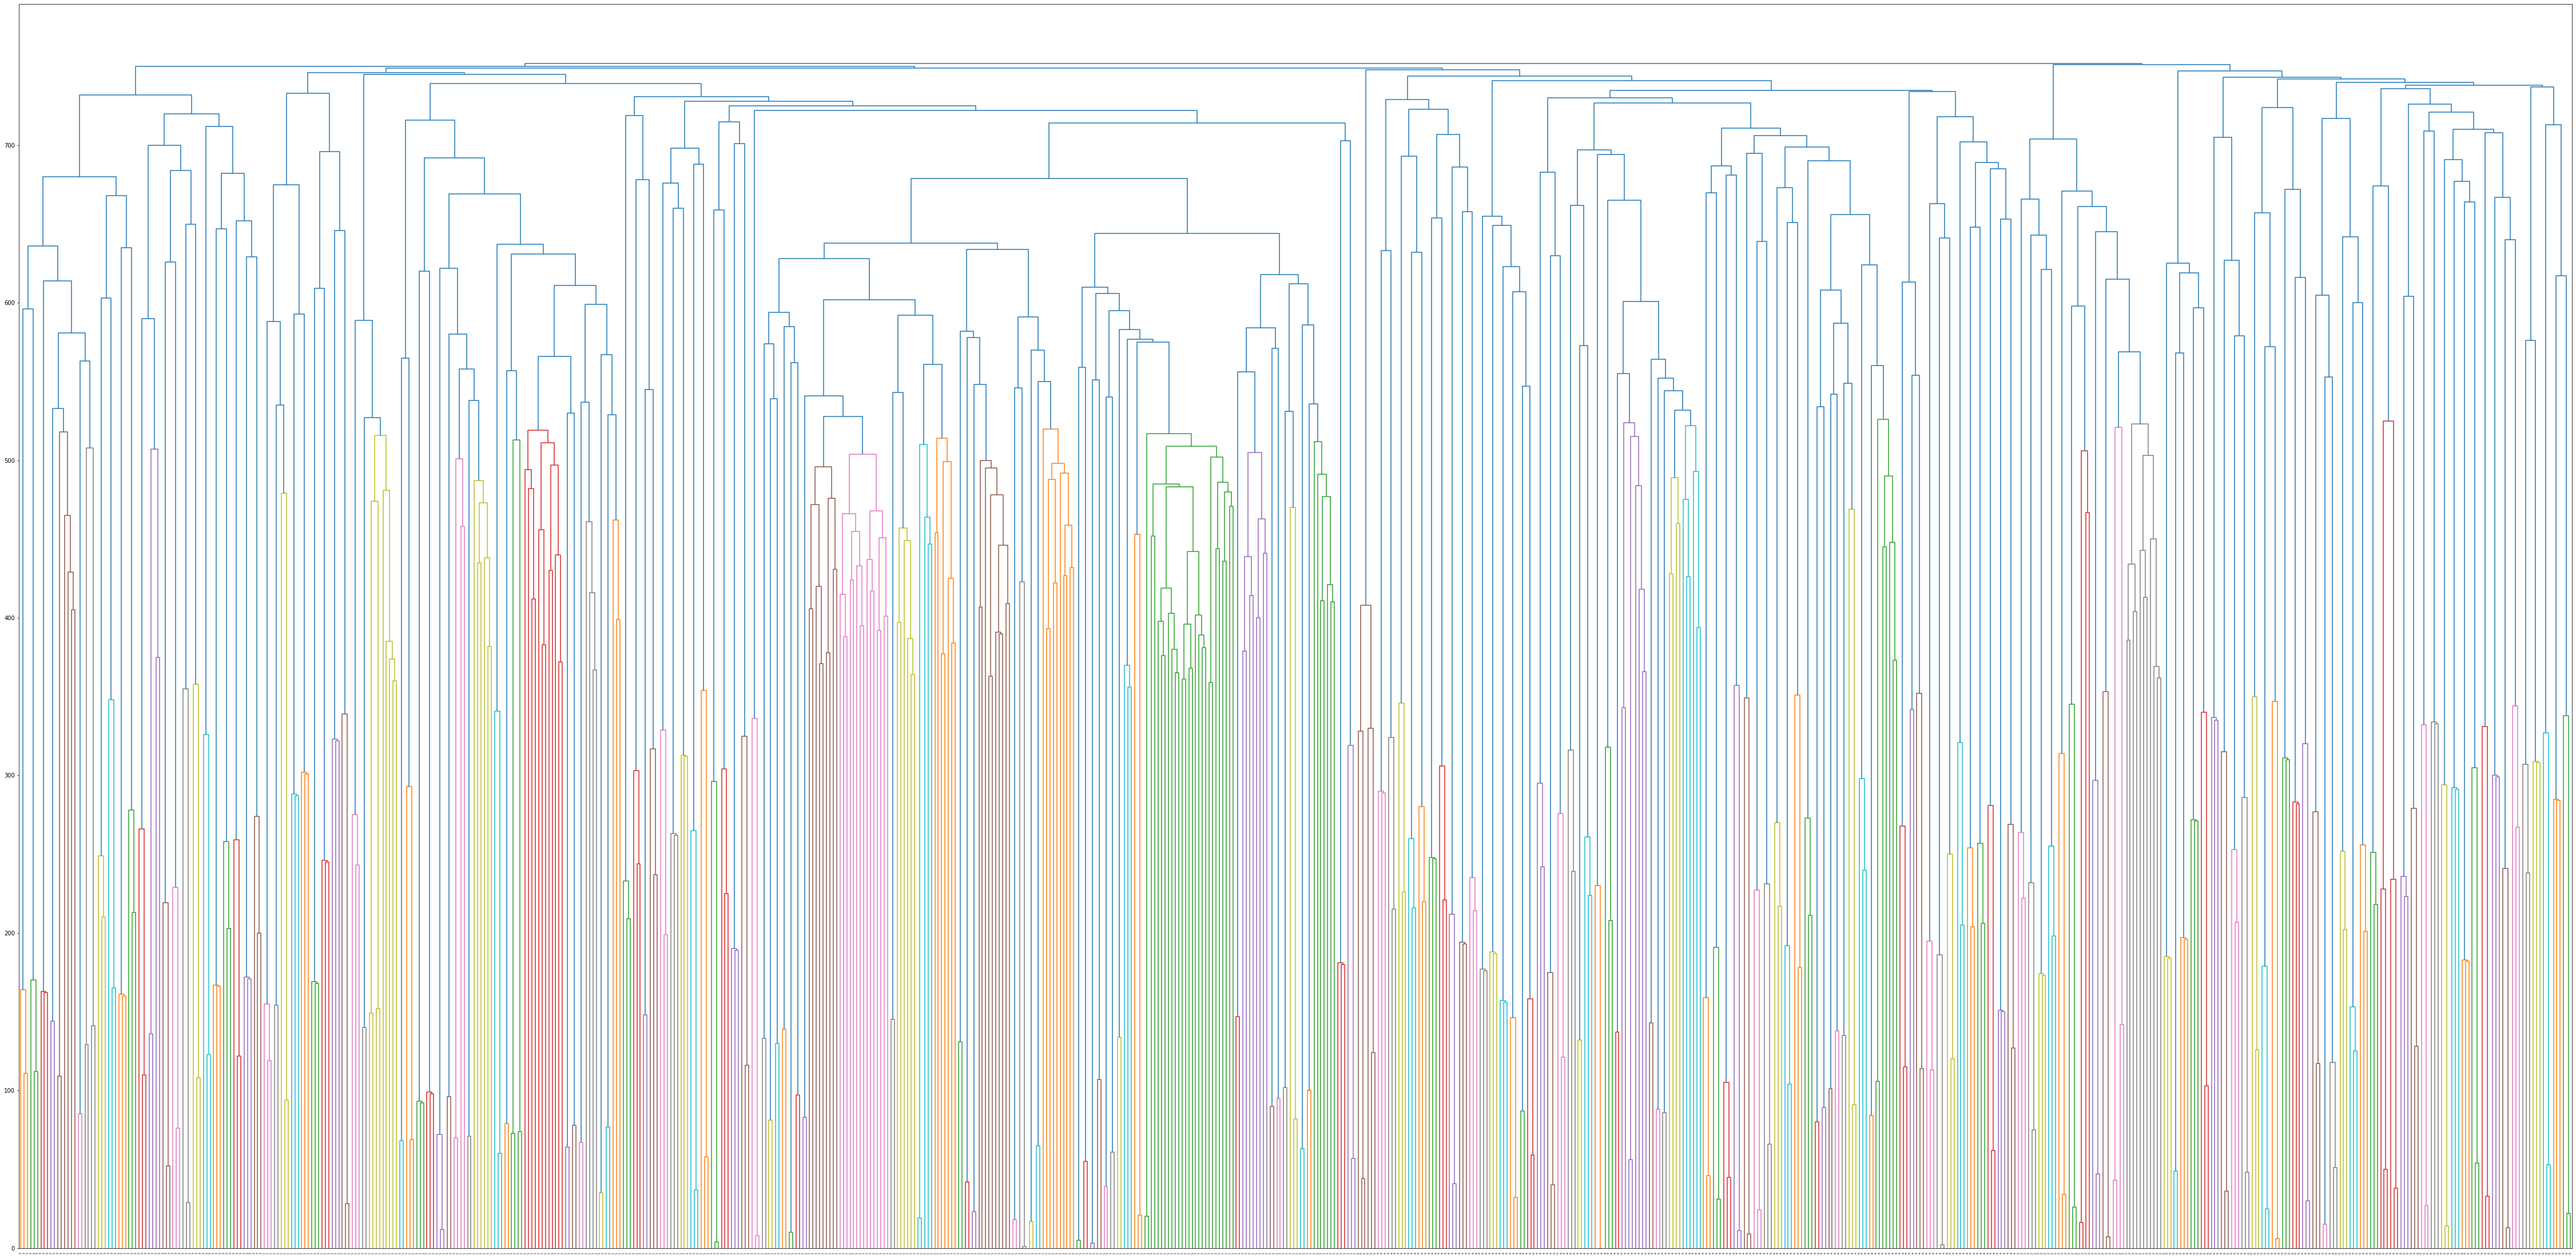

In [23]:
# Dendrogram
def plot_dendrogram( model, **kwargs ):
    fig, axes = plt.subplots( figsize=(80, 40))
    children = model.children_
    distance = np.arange( len( children ) )
    no_of_observations = np.arange( 2, len( children ) + 2 )
    linkage_metrix = np.column_stack( [ children, distance, no_of_observations ] ).astype( float )
    dendrogram( linkage_metrix, **kwargs )

plot_dendrogram( hac, labels=hac.labels_ )


In [12]:
import jieba.analyse
jieba.load_userdict( '../../text_mining/politic_dict.txt' )

f = open( f'../../src_txt/3.txt', encoding="utf8" )
doc = f.readlines()[2:]
f.close()

doc = ' '.join( doc )

tags = jieba.analyse.extract_tags( doc, topK=5, withWeight=True )

for tag in tags:
    print( 'word:', tag[ 0 ], 'tf-idf:', tag[ 1 ] )

word: 市長 tf-idf: 0.41461621397341036
word: 國民黨 tf-idf: 0.3455135116445086
word: 人選 tf-idf: 0.3455135116445086
word: 新竹 tf-idf: 0.28755589402861276
word: 林耕仁 tf-idf: 0.2764108093156069
